In [1]:
from functions_extras import criar_treino_teste

In [2]:
criar_treino_teste('./dataset_fruits/', 0.3)

Criando particionamento
	 459 	+ 197 	= 656 	 -> Apple Granny Smith
	 459 	+ 197 	= 656 	 -> Apple Red 2
	 435 	+ 187 	= 622 	 -> Kiwi
	 459 	+ 197 	= 656 	 -> Limes
	 459 	+ 197 	= 656 	 -> Nectarine
	 408 	+ 176 	= 584 	 -> Onion White
	 459 	+ 197 	= 656 	 -> Peach Flat
	 459 	+ 197 	= 656 	 -> Pear Williams
	 393 	+ 169 	= 562 	 -> Plum 2
	 420 	+ 180 	= 600 	 -> Potato White
	 442 	+ 190 	= 632 	 -> Watermelon
Particionamento criado com sucesso!


In [1]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

from tensorflow import keras
print("versão do Keras:", keras.__version__)

# IMPORTANDO COMANDOS E FUNÇÕES #

import numpy as np
import matplotlib.pyplot as plt #gerar gráfico
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

import pickle

# IMPORTANDO LAYERS PARA A CNN #

from keras.models import Sequential
from keras import layers
from keras.layers import Dropout

Versão do TensorFlow: 2.1.0
versão do Keras: 2.2.4-tf


Using TensorFlow backend.


In [2]:
# MONTANDO A ESTRUTURA DA CNN #

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5)) # dropout de 50%
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(layers.Flatten()) # camada de achatamento
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(units = 11, activation = 'softmax')) # 11 unidades de saída (11 classes)

In [3]:
import h5py

print("versao do h5py:", h5py.__version__)

versao do h5py: 2.10.0


In [4]:
model.summary() # resumo da estrutura, com os parâmetros ajustáveis

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)       

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [6]:
# DIVIDIR AS 8000 IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

from keras.preprocessing.image import ImageDataGenerator

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.2) # comando para reescala + divisão em 20% para validação

# imagens de treino (80%) 

train_data = datagen.flow_from_directory('dataset_fruits/Training', 
                                         subset = 'training',
                                         batch_size = 16,
                                         target_size = (64, 64)) # definindo tamanho das imagens

# imagens de validação (20%)

valid_data = datagen.flow_from_directory('dataset_fruits/Training',
                                         subset='validation',
                                         batch_size = 16,
                                         target_size = (64, 64))

Found 4160 images belonging to 11 classes.
Found 1037 images belonging to 11 classes.


In [7]:
# DEFININDO O COMANDO EARLYSTOPPING #

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 10) #early stopping baseado na melhor acurácia de validação

In [8]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es])

# informação: steps_per_epoch = número de imagens / batch_size

Epoch 1/100
260/260 [==============================] - 21s 81ms/step - loss: 1.7338 - accuracy: 0.3656 - val_loss: 0.8012 - val_accuracy: 0.7435
Epoch 2/100
260/260 [==============================] - 21s 80ms/step - loss: 0.6178 - accuracy: 0.7632 - val_loss: 0.4931 - val_accuracy: 0.8312
Epoch 3/100
260/260 [==============================] - 22s 83ms/step - loss: 0.3798 - accuracy: 0.8558 - val_loss: 0.2173 - val_accuracy: 0.8023
Epoch 4/100
260/260 [==============================] - 22s 85ms/step - loss: 0.2637 - accuracy: 0.9012 - val_loss: 0.1120 - val_accuracy: 0.8602
Epoch 5/100
260/260 [==============================] - 21s 82ms/step - loss: 0.2164 - accuracy: 0.9212 - val_loss: 0.1601 - val_accuracy: 0.9489
Epoch 6/100
260/260 [==============================] - 22s 83ms/step - loss: 0.2033 - accuracy: 0.9238 - val_loss: 0.0657 - val_accuracy: 0.9547
Epoch 7/100
260/260 [==============================] - 51s 197ms/step - loss: 0.1454 - accuracy: 0.9442 - val_loss: 0.3322 - val_a

In [9]:
model.save('model_proj_antigo',
          overwrite = True) 

with open('trainHistoryDict_proj_antigo', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [10]:
model = keras.models.load_model('model_proj_antigo')
history = pickle.load(open('trainHistoryDict_proj_antigo', "rb"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)       

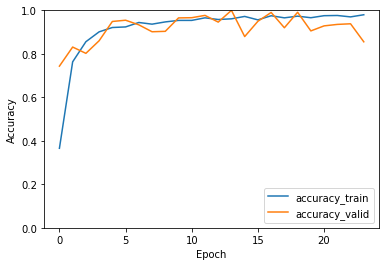

In [12]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #
plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

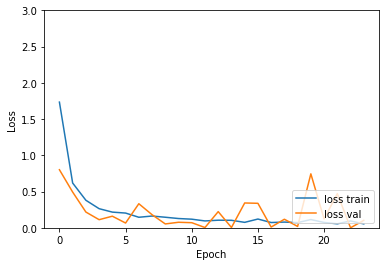

In [13]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [14]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_fruits/Test',
                                             target_size = (64, 64),
                                             batch_size = 1,
                                             shuffle=False)

Found 1739 images belonging to 11 classes.


In [15]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

  ...
    to  
  ['...']
1739/1739 [==============================] - 18s 10ms/step - loss: 0.0548 - accuracy: 0.9816
acurácia nos dados de teste: 0.9815986
loss dos dados de teste: 0.054794727159141396


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print(test_data.classes)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(1739,)
[ 0  0  0 ... 10 10 10]
Accuracy
0.9815986198964922
Balanced Accuracy
0.9821064301552108
Confusion Matrix
[[164   0   0   0   0   0   0   0   0   0   0]
 [  0 135   0   0  29   0   0   0   0   0   0]
 [  0   0 156   0   0   0   0   0   0   0   0]
 [  0   0   0 166   0   0   0   0   0   0   0]
 [  0   0   0   0 164   0   0   0   0   0   0]
 [  0   0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   0   0   0 164   0   0   0   0]
 [  0   0   0   0   0   0   0 166   0   0   0]
 [  0   0   0   0   0   0   0   0 142   0   0]
 [  0   0   0   0   0   3   0   0   0 147   0]
 [  0   0   0   0   0   0   0   0   0   0 157]]
Classification Report
